# NLP

A lo largo del notebook vamos a trabajar con el siguiente dataset:

https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection/

El objetivo es que se familiaricen con algunas herramientas típicas del Procesamiento del Lenguaje Natural (NLP por sus siglas en inglés). Para ello, es requisito que miren los videos de la plataforma de Acámica y vuelquen lo aprendido acá.

La biblioteca fundamental que vamos a usar es NLTK. Probablemente tengan que instalarla. Para ello, pongan `conda install nltk` en la terminal.

## 1. Carga de datos

Lo primero que tienen que hacer es fijarse en qué formato están los datos. ¿De qué se trata es formato?¿Cómo se abre? Si googlean, van a ver que hay muchas formas de abrir archivos JSON con Python. Como venimos trabajando con Pandas, googleen "Open JSON with Pandas". Prueben esa función. Si les tira un error en el primer intento, googleen el error. Les aseguramos que la respuesta está muy a mano y es muy accesible, no tienen que hacer nada raro.

In [1]:
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk

#Esto sirve para configurar NLTK. La primera vez puede tardar un poco
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/tele/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/tele/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
dataset = pd.read_json('Sarcasm_Headlines_Dataset.json', lines= True)
dataset.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


¿Qué forma tiene el dataset?¿Cuántas instancias?¿Cuáles son sus columnas?¿Cuántos titulares hay de cada tipo?¿Podemos hablar ya de *features*?

In [3]:
dataset.shape

(26709, 3)

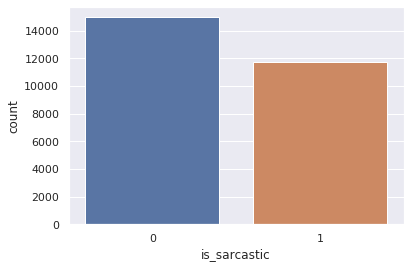

In [4]:
sns.countplot(dataset.is_sarcastic)
plt.show()

## 2. Breve exploración del dataset

Elegir una instancia del dataset al azar y seleccionar el *headline*.

In [5]:
index_random = np.random.randint(0,high = dataset.shape[0])
titular = dataset.iloc[index_random].headline
print(index_random, titular)

4003 these vintage ads prove we had no idea what the future would actually look like


¿Les parece que es sarcástico?¿Qué características del texto les hace creer - o no - eso? Comprobar si es sarcástico o no imprimiendo en la celda de abajo el valor correspondiente del dataset. (Como la mayoría de los titulares están en inglés y encima refieren a política local, no se preocupen si es una tarea difícil).

In [6]:
print(index_random, dataset.iloc[index_random].is_sarcastic)

4003 0


## 3. NLTK

Si es difícil para algunos humanos detectar el sarcasmo, probablemente también lo sea para una computadora. De todas formas, se puede hacer el intento. Para ello, es necesario extraer características de cada texto que nos sirvan para ir apuntando al objetivo. En los videos de Acámica hay muchos ejemplo de herramientas para aplicar. Elegir un titular que les llame la atención y probar las siguientes herramientas:

### Tokenización

¿Qué es y para qué sirve?¿Cuáles de todas las formas de tokenización presentadas les parece más útil para este problema?

1. `sent_tokenize`

In [7]:
titular_st = nltk.tokenize.sent_tokenize(titular)
titular_st

['these vintage ads prove we had no idea what the future would actually look like']

2. word_tokenize

In [8]:
titular_wt = nltk.tokenize.word_tokenize(titular)
titular_wt

['these',
 'vintage',
 'ads',
 'prove',
 'we',
 'had',
 'no',
 'idea',
 'what',
 'the',
 'future',
 'would',
 'actually',
 'look',
 'like']

### Normalización

¿Qué es y para qué sirve? Notar que varias formas de normalización ya vienen aplicadas en el dataset.

1. Stopwords

Importar los `stopwords` del inglés e imprimirlos.

In [9]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

¿Les parece conveniente aplicar todos los stopwords que aparecen en esa lista?

Eliminar del titular elegido los stopwords.

In [10]:
titular_wt_sin_sw = [word for word in titular_wt if word not in stopwords]
titular_wt_sin_sw

['vintage',
 'ads',
 'prove',
 'idea',
 'future',
 'would',
 'actually',
 'look',
 'like']

¿Cuál o cuáles palabras se fueron?

### Frecuencia de palabras

Dado el titular ya tokenizado por palabras y sin stopwords, usar `nltk` para extrar la frecuencia con que aparece cada palabras. ¿Tiene sentido esto para titulares?

In [11]:
freq = nltk.FreqDist(titular_wt_sin_sw)
freq

FreqDist({'vintage': 1, 'ads': 1, 'prove': 1, 'idea': 1, 'future': 1, 'would': 1, 'actually': 1, 'look': 1, 'like': 1})

### Dataset Completo

Antes de pasar a extraer features de cada instancia del Dataset, podemos hacer un pequeño análisis del dataset en su conjunto. Por ejemplo, una opción es agrupar todos los titulares por tipo y extraer de cada clase las palabras más frecuentes. Para ello:

1. Agrupar los titulares por tipo. Crear un dataframe para cada uno. Recuerden usar máscaras.
2. Crear una lista vacia y agregar en esa lista todos los titulares (por tipo/dataframe creado) ya tokenizados (usar el `RegexpTokenizer`) y filtrado por `stopwords`.
3. Usar el `FreqDist` en esa lista que acaban de llenar. Llevar lo que devuelve `FreqDist` a un Dataframe. Ordenar por frecuencia en que aparece cada palabra.
4. Hacer un `barplot` o similar para visualizar.
5. ¿Qué palabras filtrarían, aparte de las que aparecen en `stopwords`? Crear una lista vacía y agregarlas a mano. Agregar en el código que realizaron una línea (similar a la que usan con `stopwords`) para que también filtre por esas palabras.
6. Volver a visualizar.

#### No-Sarcasmo

In [12]:
filtrar = []
if True:
    filtrar.append("u")
    filtrar.append("new")

In [13]:
dataset_no_sarcasmo = dataset[dataset.is_sarcastic==0]
dataset_no_sarcasmo.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0


In [14]:
todos_titulares_no_sarcasmo = []
for i in range(dataset_no_sarcasmo.shape[0]):
    titular = dataset_no_sarcasmo.iloc[i].headline
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    titular = [word for word in titular if word not in stopwords]
    titular = [word for word in titular if word not in filtrar]

    todos_titulares_no_sarcasmo.append(titular)

In [15]:
todos_titulares_no_sarcasmo = list(itertools.chain(*todos_titulares_no_sarcasmo))
todos_titulares_no_sarcasmo

['former',
 'versace',
 'store',
 'clerk',
 'sues',
 'secret',
 'black',
 'code',
 'minority',
 'shoppers',
 'roseanne',
 'revival',
 'catches',
 'thorny',
 'political',
 'mood',
 'better',
 'worse',
 'j',
 'k',
 'rowling',
 'wishes',
 'snape',
 'happy',
 'birthday',
 'magical',
 'way',
 'advancing',
 'world',
 'women',
 'fascinating',
 'case',
 'eating',
 'lab',
 'grown',
 'meat',
 'ceo',
 'send',
 'kids',
 'school',
 'work',
 'company',
 'friday',
 'morning',
 'email',
 'inside',
 'trump',
 'presser',
 'ages',
 'airline',
 'passengers',
 'tackle',
 'man',
 'rushes',
 'cockpit',
 'bomb',
 'threat',
 'facebook',
 'reportedly',
 'working',
 'healthcare',
 'features',
 'apps',
 'north',
 'korea',
 'praises',
 'trump',
 'urges',
 'us',
 'voters',
 'reject',
 'dull',
 'hillary',
 'actually',
 'cnn',
 'jeffrey',
 'lord',
 'indefensible',
 'barcelona',
 'holds',
 'huge',
 'protest',
 'support',
 'refugees',
 'bloomberg',
 'program',
 'build',
 'better',
 'cities',
 'got',
 'bigger',
 'craig'

In [16]:
freq_no_sarcasmo = nltk.FreqDist(todos_titulares_no_sarcasmo)
freq_no_sarcasmo

FreqDist({'trump': 1446, 'donald': 458, 'says': 349, 'women': 317, 'one': 268, 'year': 244, 'first': 242, 'world': 241, 'man': 241, 'people': 241, ...})

In [17]:
df_no_sarcasmo = pd.DataFrame(list(freq_no_sarcasmo.items()), columns = ["Word","Frequency"])
df_no_sarcasmo.head()

,Word,Frequency
0,former,82
1,versace,1
2,store,14
3,clerk,5
4,sues,15


In [18]:
df_no_sarcasmo.sort_values('Frequency',ascending=False, inplace = True)
df_no_sarcasmo.head()

,Word,Frequency
46,trump,1446
229,donald,458
421,says,349
29,women,317
258,one,268


In [19]:
df_no_sarcasmo.reset_index(drop = True, inplace=True)
df_no_sarcasmo.head()

,Word,Frequency
0,trump,1446
1,donald,458
2,says,349
3,women,317
4,one,268


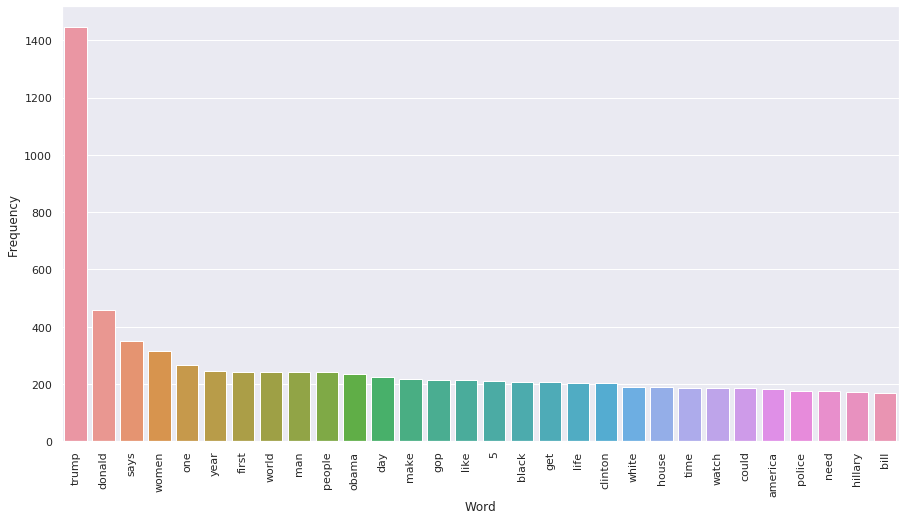

In [20]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_no_sarcasmo.iloc[:30].Word, y = df_no_sarcasmo.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

#### Sarcasmo

In [21]:
dataset_sarcasmo = dataset[dataset.is_sarcastic==1]
dataset_sarcasmo.head()

,article_link,headline,is_sarcastic
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
15,https://entertainment.theonion.com/nuclear-bom...,nuclear bomb detonates during rehearsal for 's...,1
16,https://www.theonion.com/cosby-lawyer-asks-why...,cosby lawyer asks why accusers didn't come for...,1


In [22]:
todos_titulares_sarcasmo = []
for i in range(dataset_sarcasmo.shape[0]):
    titular = dataset_sarcasmo.iloc[i].headline
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    titular = [word for word in titular if word not in stopwords]
    titular = [word for word in titular if word not in filtrar]
    todos_titulares_sarcasmo.append(titular)

In [23]:
todos_titulares_sarcasmo = list(itertools.chain(*todos_titulares_sarcasmo))
todos_titulares_sarcasmo

['mom',
 'starting',
 'fear',
 'son',
 'web',
 'series',
 'closest',
 'thing',
 'grandchild',
 'boehner',
 'wants',
 'wife',
 'listen',
 'come',
 'alternative',
 'debt',
 'reduction',
 'ideas',
 'top',
 'snake',
 'handler',
 'leaves',
 'sinking',
 'huckabee',
 'campaign',
 'nuclear',
 'bomb',
 'detonates',
 'rehearsal',
 'spider',
 'man',
 'musical',
 'cosby',
 'lawyer',
 'asks',
 'accusers',
 'come',
 'forward',
 'smeared',
 'legal',
 'team',
 'years',
 'ago',
 'stock',
 'analysts',
 'confused',
 'frightened',
 'boar',
 'market',
 'courtroom',
 'sketch',
 'artist',
 'clear',
 'manga',
 'influences',
 'trump',
 'assures',
 'nation',
 'decision',
 'syrian',
 'airstrikes',
 'came',
 'carefully',
 'considering',
 'passing',
 'whims',
 'ex',
 'con',
 'back',
 'behind',
 'bar',
 'careful',
 'consideration',
 'bush',
 'recommends',
 'oil',
 'drilling',
 'giant',
 'altoid',
 'heading',
 'toward',
 'earth',
 'robin',
 'williams',
 'inflicted',
 'holiday',
 'moviegoers',
 'eighth',
 'straight',

In [24]:
freq_sarcasmo = nltk.FreqDist(todos_titulares_sarcasmo)
freq_sarcasmo

FreqDist({'man': 1154, 'area': 480, 'report': 426, 'nation': 339, 'woman': 319, 'year': 308, 'one': 273, 'old': 267, 'time': 252, 'day': 245, ...})

In [25]:
df_sarcasmo = pd.DataFrame(list(freq_sarcasmo.items()), columns = ["Word","Frequency"])
df_sarcasmo.head()

,Word,Frequency
0,mom,117
1,starting,32
2,fear,16
3,son,71
4,web,7


In [26]:
df_sarcasmo.sort_values('Frequency',ascending=False, inplace = True)
df_sarcasmo.head()

,Word,Frequency
30,man,1154
182,area,480
157,report,426
56,nation,339
183,woman,319


In [27]:
df_sarcasmo.reset_index(drop = True, inplace=True)
df_sarcasmo.head()

,Word,Frequency
0,man,1154
1,area,480
2,report,426
3,nation,339
4,woman,319


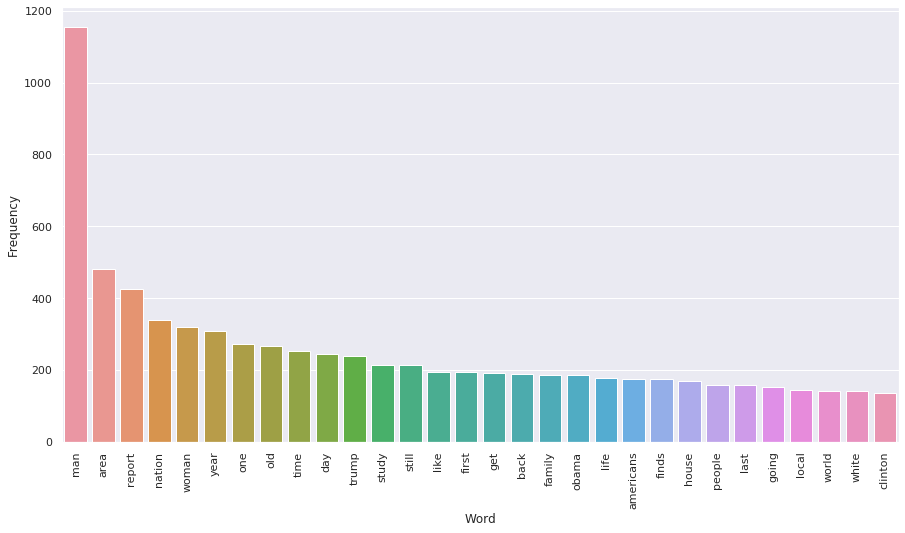

In [28]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_sarcasmo.iloc[:30].Word, y = df_sarcasmo.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()